# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
Data = pd.read_csv('/content/haberman.csv')

In [3]:
Data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# Explanation of Data 

##1. **age** : Age is time  in patient operation was done 
##2  **year**: year is operation year in which  patient operation was done 
##3. **nodes** : nodes is if patient lymph got effection by operation or not 
##4. **status** : status is 0 or 1 if patient got survived then status is 1  if not then survival status is 0

#Statistical Analysis

In [4]:
print(Data.shape)
print(Data.shape[0])

(306, 4)
306


In [5]:
print(Data['status'].nunique())
print(Data['status'].unique())

2
[1 2]


In [6]:
print(Data['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


In [7]:
Data_1 = Data.loc[Data["status"] == 1]
Data_2 = Data.loc[Data["status"] == 2]

### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

# Data observations

##1. Data is imbalanced dataset 
##2. Data is consist of 3 independent variables **year , nodes ,age** and 1 dependent variable **status**
##3. surrival status is defined by value 0 and 1 


#Objective of Data : we have to check whether patient was survived for more than 5 years or not 

#Bi-Variate Analysis
2D Scatter Plot

<Figure size 432x288 with 0 Axes>

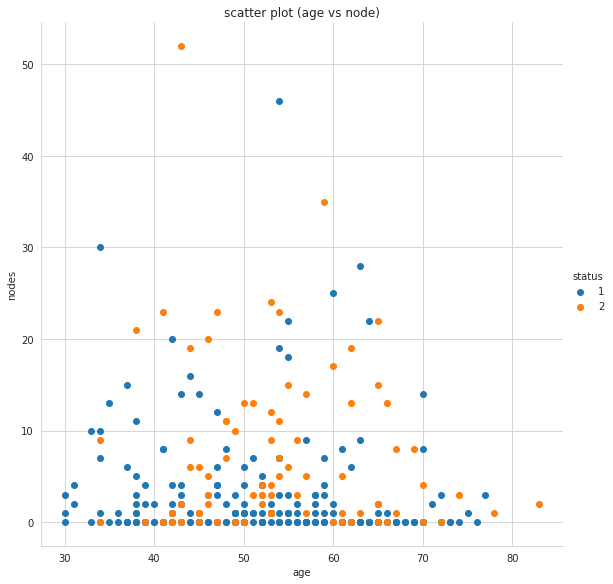

In [8]:
plt.figure()
sns.set_style("whitegrid")
g=sns.FacetGrid(Data,hue="status",size=8)
g.map(plt.scatter,'age','nodes')
plt.title("scatter plot (age vs node)")
g.add_legend()

#Pair Plot

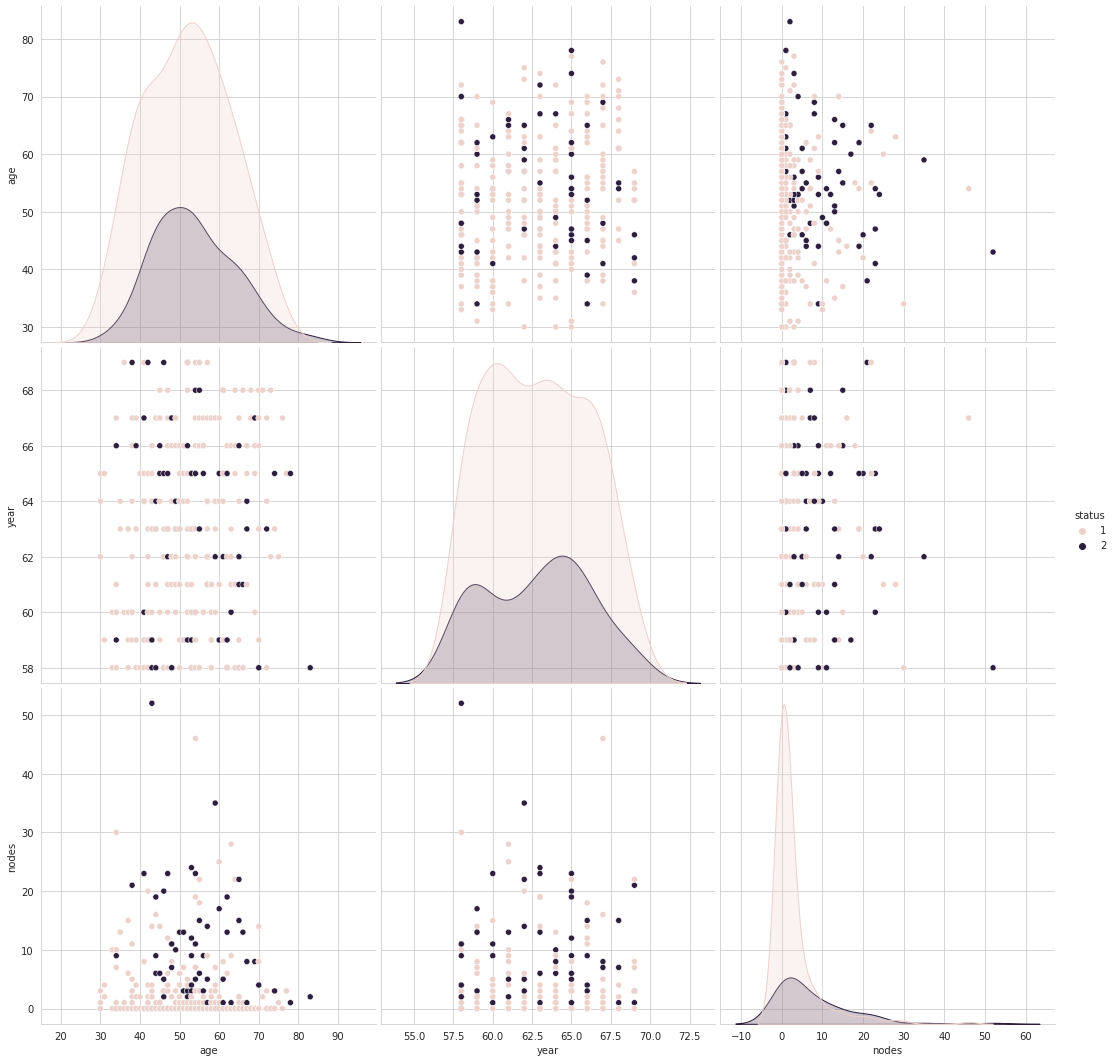

In [9]:
sns.pairplot(Data,hue="status",vars=["age","year","nodes"],size=5)


#Uni-Variate Analysis
Histogram

Text(0.5, 1.0, 'Histogram Of Age')

<Figure size 432x288 with 0 Axes>

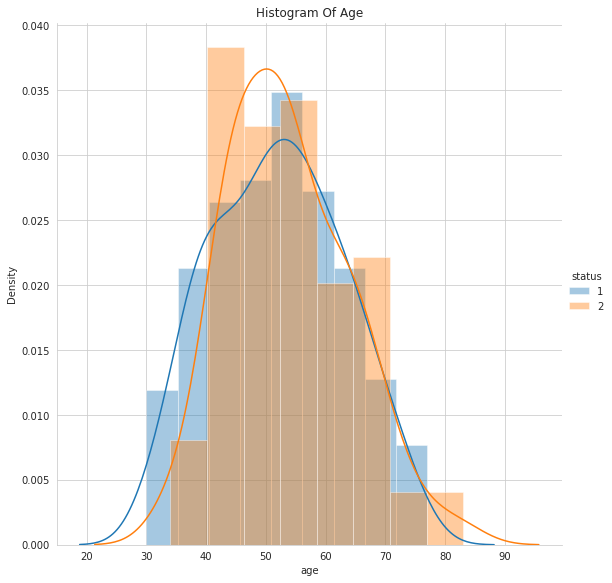

In [10]:
plt.figure()
g=sns.FacetGrid(Data,hue="status",size=8)
g.map(sns.distplot,"age")
g.add_legend()
plt.title("Histogram Of Age")

<Figure size 432x288 with 0 Axes>

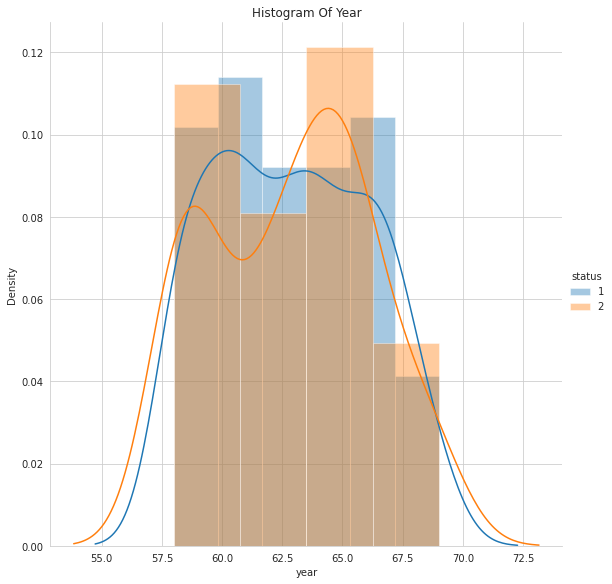

In [11]:
plt.figure()
g=sns.FacetGrid(Data,hue="status",size=8)
g.map(sns.distplot,"year")
plt.title("Histogram Of Year")
g.add_legend()

<Figure size 432x288 with 0 Axes>

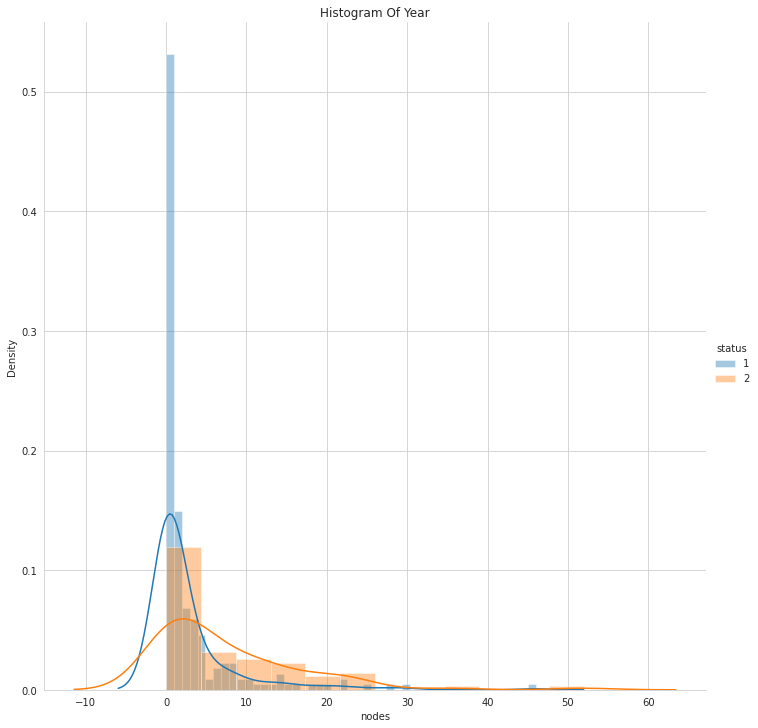

In [12]:
plt.figure()
g=sns.FacetGrid(Data,hue="status",size=10)
g.map(sns.distplot,"nodes")
plt.title("Histogram Of Year")
g.add_legend()

# OBSERVATION

##1 . I DONT THINK WE HAVE GOT ANY CLEAR PICTURE FROM THIS HISTOGRAM .
##2.  FEATURE AGE AND YEAR IS HIGHLY OVRLAPPING 
##3. WE HAVE TO GO FOR FURTHER ANALYSIS LIKE BIVARIATE ANALYSIS 

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

# PDF AND CDF

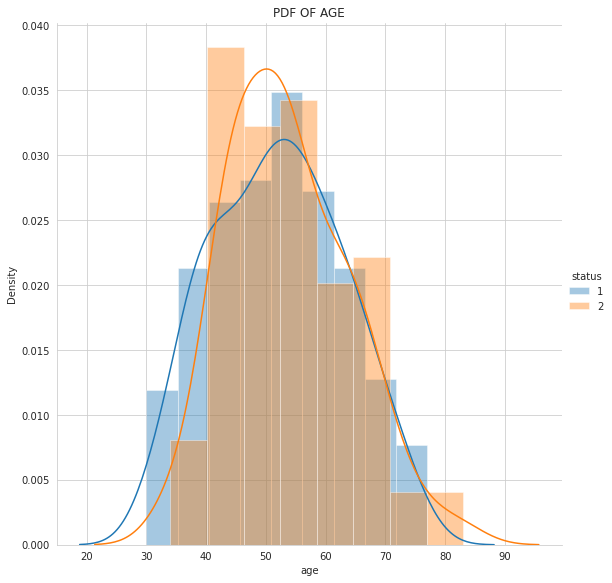

In [13]:
sns.FacetGrid(Data,hue="status",height = 8)\
.map(sns.distplot,"age").set(title='PDF OF AGE')\
. add_legend();
plt.show()

# we cannot conclude more from this plot its highly overlapping 

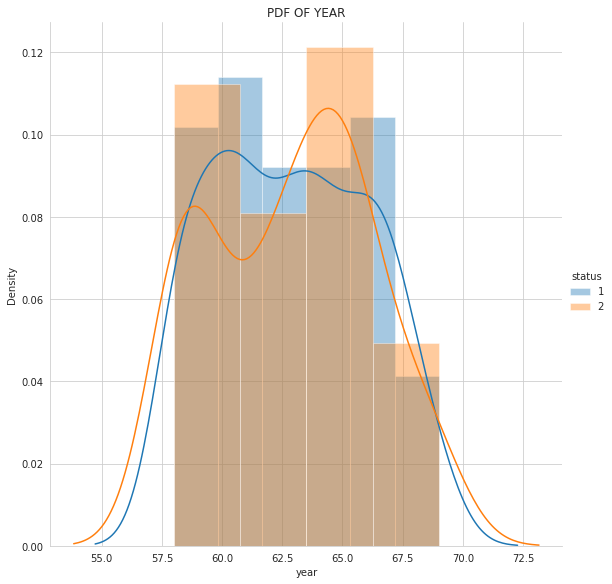

In [14]:
sns.FacetGrid(Data,hue="status",height = 8)\
.map(sns.distplot,"year").set(title='PDF OF YEAR')\
. add_legend();
plt.show()

# the patient who has done the operation their age is between 58 to 68 years 
# but how many patient survived or not survived cannot conclude more because of overlapping


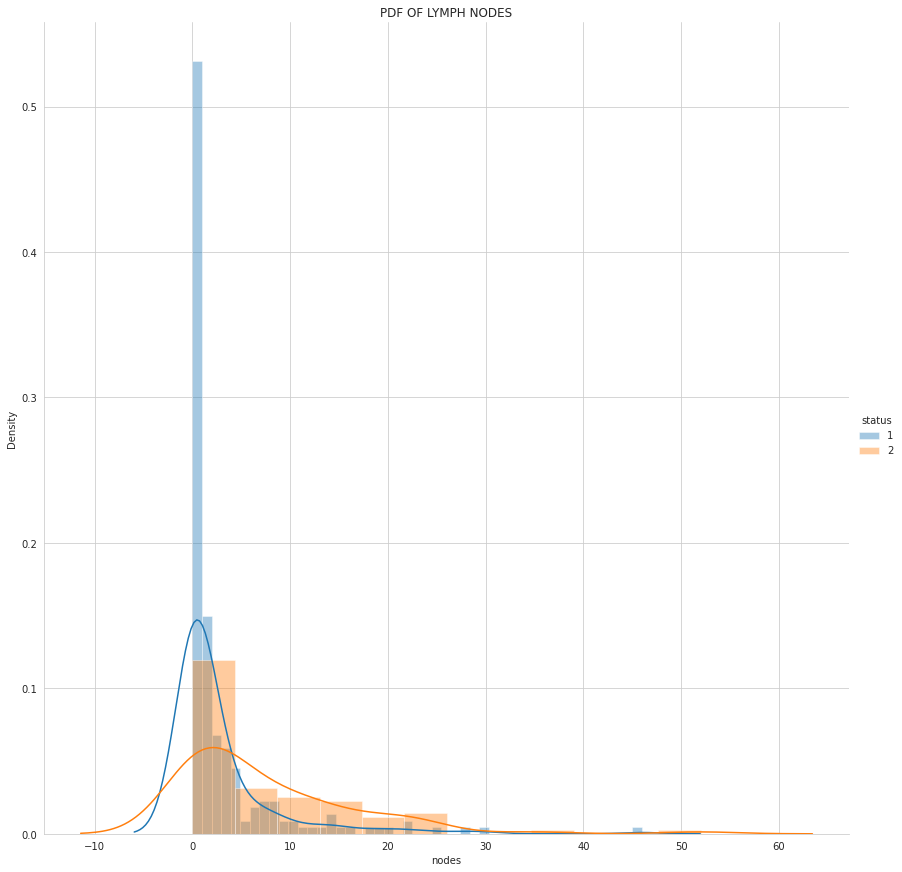

In [15]:
sns.FacetGrid(Data,hue="status",height = 12)\
.map(sns.distplot,"nodes").set(title='PDF OF LYMPH NODES')\
. add_legend();
plt.show()

# majority of patient who has survived they have less number of nodes 


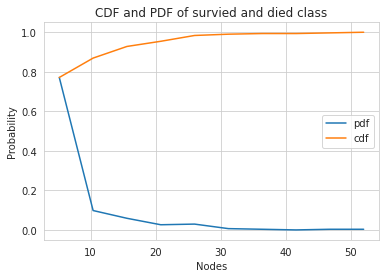

In [16]:
#Plot CDF of nodes for survied and died
counts, bin_edges = np.histogram(Data['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
#print("pdf for nodes", pdf);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf');
plt.plot(bin_edges[1:], cdf, label='cdf')
plt.title('CDF and PDF of survied and died class')
plt.xlabel('Nodes')
plt.ylabel('Probability')
plt.legend()
plt.show();

# observation 

**1. around 78-80% patient has probability of surviving if patient has less than 10 lymph nodes**

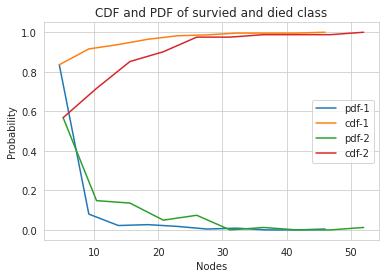

In [17]:
#Plot CDF of nodes for survied and died
counts, bin_edges = np.histogram(Data_1['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
#print("pdf for nodes", pdf);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf-1');
plt.plot(bin_edges[1:], cdf, label='cdf-1')

#Plot CDF of nodes for survied and died
counts, bin_edges = np.histogram(Data_2['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
#print("pdf for nodes", pdf);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf-2');
plt.plot(bin_edges[1:], cdf, label='cdf-2')
plt.title('CDF and PDF of survied and died class')
plt.xlabel('Nodes')
plt.ylabel('Probability')
plt.legend()
plt.show();

OBSERVATION 

**1. IT seems that from above pdf 1 that if patient has less than 10 nodes then patient has 82% chances of surviving**

**2. we can see that patient has both probability of surviving and dieing.**

**3. from pdf2 we can see that around 58% patient died who as 10 or less than 10 lymoh nodes**

#Box Plot

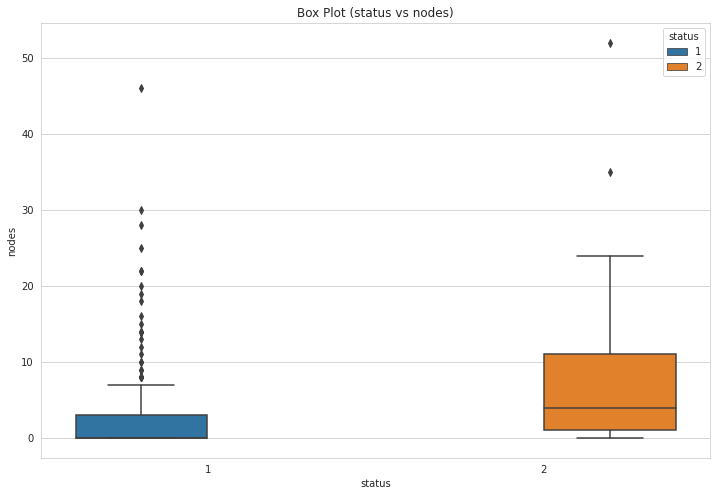

In [18]:
plt.figure(figsize=(12,8))
plt.title("Box Plot (status vs nodes)")
sns.boxplot(data=Data,x='status',y='nodes',hue='status')

# obervation 

**1. most number of patient survived who has less number of nodes and patient who has not survived has more number of nodes**

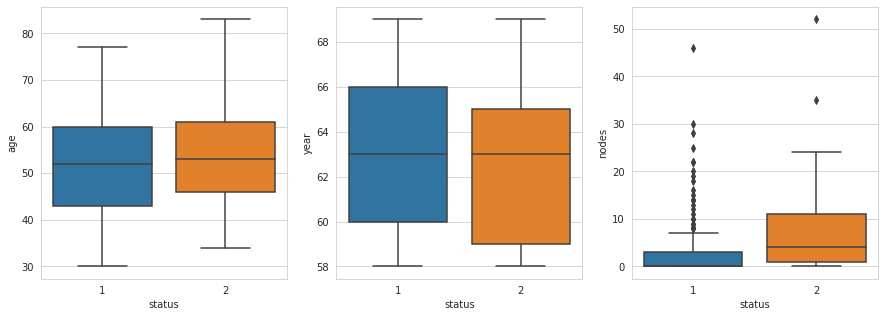

In [19]:


fig, axes = plt.subplots(1,3,figsize=(15,5))
for idx, feature in enumerate(list(Data.columns)[:-1]):
  sns.boxplot(x="status", y=feature,data=Data, ax=axes[idx])
plt.show()

# observation 

**patient who has survived more than five year their age lies between 42 to 60**

**patient who has not survived more than five years their age group 45 to 62**

**patient has survived of them 80% has less than 10 nodes and patient who dies most they have more than 10 nodes**


#Violin Plot


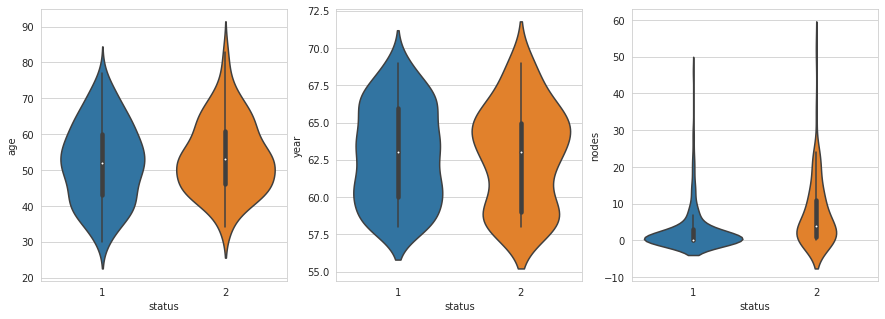

In [20]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
for idx, feature in enumerate(list(Data.columns)[:-1]):
  sns.violinplot(x="status", y=feature,data=Data, ax=axes[idx])
plt.show()

# observation : **Voilin plot**

## **Most patient who survived age lis between 42 to 65 and patient most of patient who has not survived their age is between 45 to 55**

## **patient who survived more than 5 years they lies between 60 to 67 and patient who did not survived more than 5 year their age lies between 62 to 68 its overlapping here**

## **almost patient who has survived their nodes lies in less than 10 nodes , And patient who not survived they more number of nodes or can say more than 10 nodes**

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


# **scatter plot**

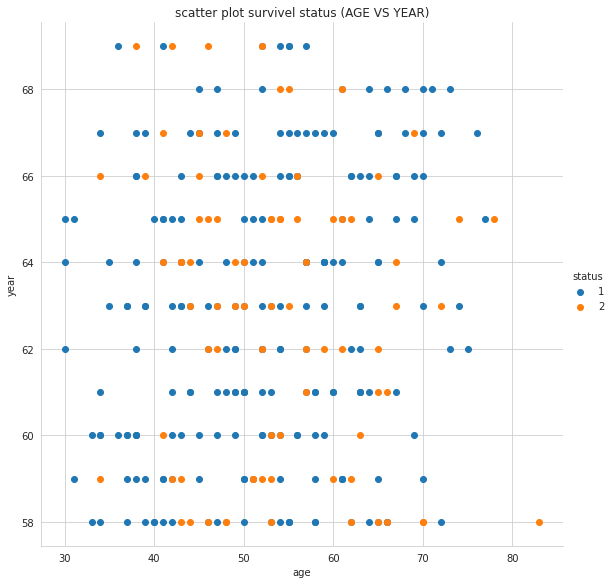

In [21]:
sns.set_style("whitegrid")
sns.FacetGrid(Data, hue = "status" , height = 8)\
.map(plt.scatter,"age","year").set(title='scatter plot survivel status (AGE VS YEAR)')\
.add_legend()
plt.show()

# **observation : scatter plot**

## **you can see high overlap between patient age who has survived or not survived so cannot conclude more from this plot**

# observation 

## This plot year vs age is highly overlapping we cannot conclude more from this 


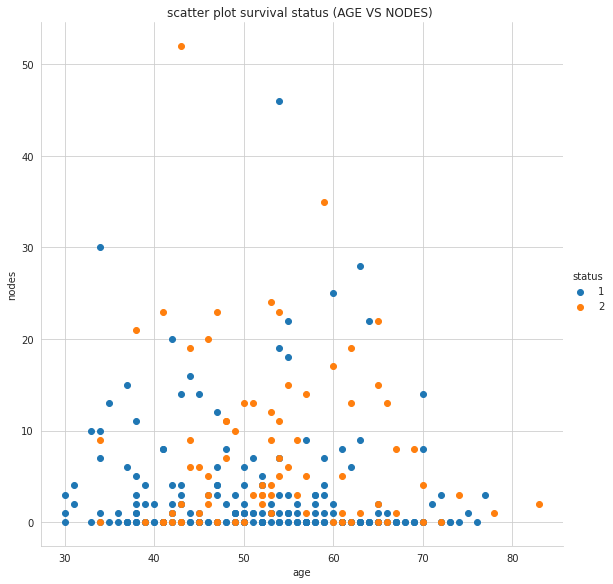

In [22]:
sns.set_style("whitegrid")
sns.FacetGrid(Data, hue = "status" , height = 8)\
.map(plt.scatter,"age","nodes").set(title='scatter plot survival status (AGE VS NODES) ')\
.add_legend()
plt.show()

#OBERVATION : **NODEX VS AGE**

##1. patient has less number of nodes their chances of survival are high.
##2. more than 80-90% patient got survived who has less than 10 nodes .
##3. yess their is some ouliter situation where patient survied and some dies

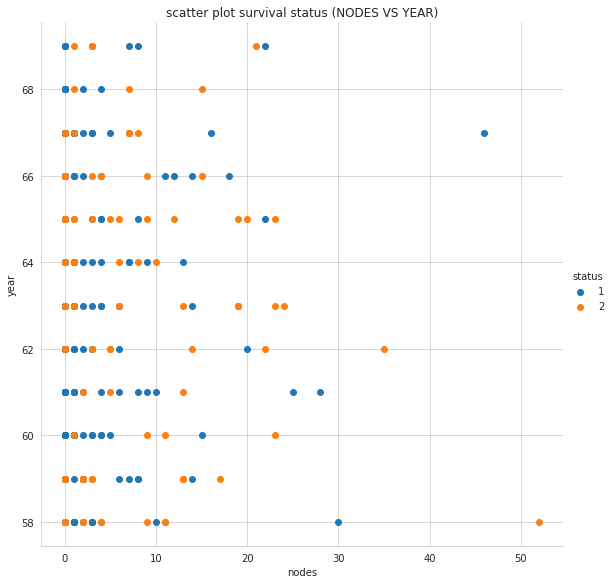

In [23]:
sns.set_style("whitegrid")
sns.FacetGrid(Data, hue = "status" , height = 8)\
.map(plt.scatter,"nodes","year").set(title='scatter plot survival status (NODES VS YEAR)')\
.add_legend()
plt.show()

#Observation **year vs nodes**

##1. patient who has more than 10 nodes their chances of living very less
##2. patient who has age between 60 to 65 they have done more number of operations
## 3. high overlapping in plot 


# Pair plot

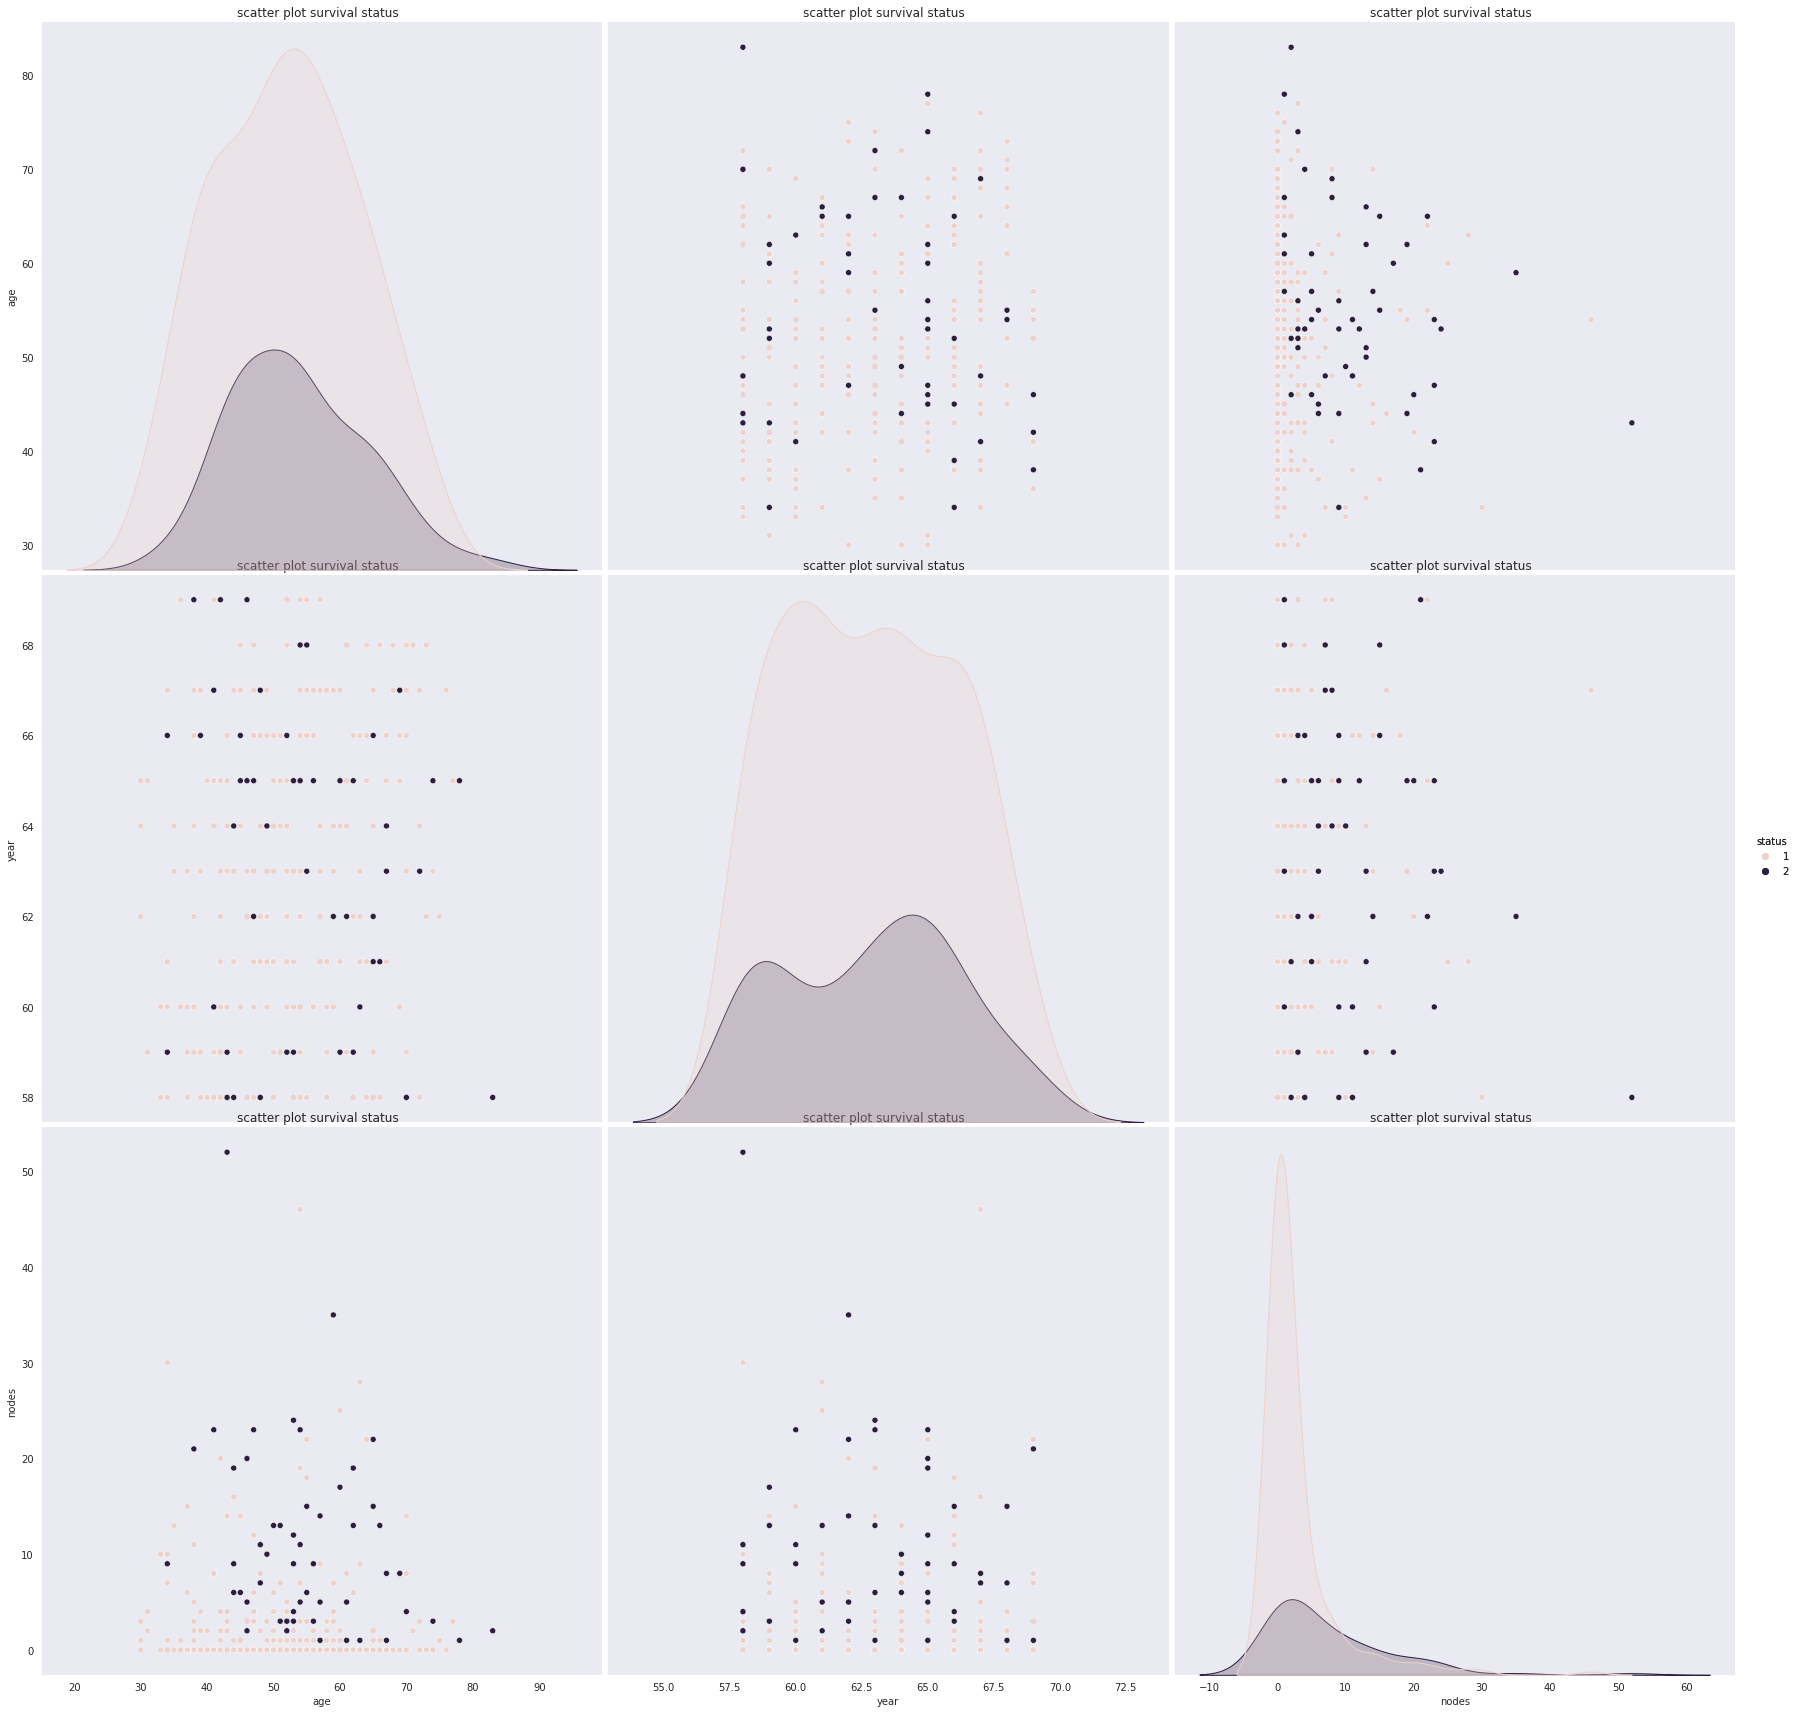

In [24]:
sns.set_style("dark")
sns.pairplot(Data, hue="status", height = 8).set(title='scatter plot survival status  ')\
.add_legend()
plt.show()

# **observation : pair plot**

##**ignore the digonal plot first for better understanding**
##plot no 2 : **high overlapping between data points cannot conclude more**
##plot no 3 : **yes in this plot we can see much better sepration between datapoints**
##plot no 4 : **again highoverlapping between datapoints**
#3plot no 6 : **litte bit overlap but betwen than plot 4**
#3plot no 7 : **yes this plot looks some sensibe both the patient who has survived or not survived seprated well**
##plot 8: **not looking too sensible**



### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

# stastical analysis 

# **patient who survived**

In [25]:
Data_1.describe()

,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


# **patient who not survived**

In [26]:
Data_2.describe()

,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


# observation : Statistical analysis 

nodes mean for patient who **survived is : 2.79**

nodes mean for patient who **not survived : 7.456**

nodes standard_devi for patient who **survived :5.870**

nodes standard_devi for patient who **not survived : 9.185**







# **conclusion**


## **Feature node is most imp in term of chances of survival of patient but not sufficient**

## **feature age and year is not imporatant like nodes**

## **80 % of patient survived more than 5 years who has less than 5 or having no  nodes**

## **Dataset highly overlap and imbalanced dataset**

## **between the age_group of 45 to 60 patient has survived more**

## **we have to do more featurization for more better analysis and insights**